# NISHCHAL VERMA E-COM ANALYSIS

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Dataset

In [93]:
df1 = pd.read_csv('/Users/nishchalverma/Downloads/Virgio/2019-Oct.csv',parse_dates=['event_time'])

In [94]:
df2=pd.read_csv('/Users/nishchalverma/Downloads/Virgio/2019-Nov.csv',parse_dates=['event_time'])

In [95]:
df = pd.concat([df1, df2],axis=0,ignore_index=True)

### Data Exploration 

In [57]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Growth/Decline,Month
0,2019-10-01 00:00:00+00:00,view,44600062,2103807459595387724,electronics.smartphone,None,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c,NaN,2019-10
1,2019-10-01 00:00:00+00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,None,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc,NaN,2019-10
2,2019-10-01 00:00:01+00:00,view,17200506,2053013559792632471,furniture.living_room.sofa,None,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8,NaN,2019-10
3,2019-10-01 00:00:01+00:00,view,1307067,2053013558920217191,computers.notebook,None,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713,NaN,2019-10
4,2019-10-01 00:00:04+00:00,view,1004237,2053013555631882655,electronics.smartphone,None,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d,NaN,2019-10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950743 entries, 0 to 109950742
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.4+ GB


In [61]:
df.shape

(109950731, 11)

In [9]:
df.describe()

,product_id,category_id,price,user_id
count,1.099507e+08,1.099507e+08,1.099507e+08,1.099507e+08
mean,1.175577e+07,2.057707e+18,2.916348e+02,5.366698e+08
std,1.543564e+07,1.949326e+16,3.566800e+02,2.145173e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,1.030022e+07
25%,1.005256e+06,2.053014e+18,6.796000e+01,5.162629e+08
50%,5.100396e+06,2.053014e+18,1.649300e+02,5.326415e+08
75%,1.720051e+07,2.053014e+18,3.601100e+02,5.563312e+08
max,1.000286e+08,2.187708e+18,2.574070e+03,5.799699e+08


In [40]:
df['product_id'].nunique()

206876

In [42]:
unique_users = df['user_id'].nunique()
print(f"Number of Unique Events: {unique_users}")

Number of Unique Events: 5316649


In [45]:
unique_events = df['event_type'].unique()
unique_events

array(['view', 'purchase', 'cart'], dtype=object)

### Dealing with Missing values

In [10]:
df.isnull().sum()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    35413780
brand            15341158
price                   0
user_id                 0
user_session           12
dtype: int64

In [7]:
df['brand']=df['brand'].fillna(statistics.mode(df['brand']),inplace=True)

In [8]:
df['category_code']=df['category_code'].fillna(df['category_code'].mode()[0])

In [9]:
df['brand']=df['brand'].fillna(method='ffill')

In [10]:
df.dropna(subset=['user_session'],inplace=True)

In [36]:
df.isnull().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

We have successfully dealt with the missing values of the data by proper imputations 

### Dealing with Outliers

In [15]:
def outlier(feature):
    q1,q3 = np.percentile(feature,(25,75))
    iqr = q3-q1
    print("IQR",iqr)
    print("Q1",q1)
    print("Q3",q3)
    upperbound = q3 + iqr*1.5
    lowerbound = q1 - iqr*1.5
    outliers = []
    for i in feature:
        if i < lowerbound or i > upperbound:
            outliers.append(i)
    print(outliers)
    return len(outliers)
print("Outliers in price:{}")
outlier(df['price'])

Outliers in price:{}
IQR 292.15000000000003
Q1 67.96
Q3 360.11


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



9598630

As we see from the count of outliers, the outlier percentage is substatially less compared to the data we can keep the outliers to preserve the total data

### Distribution of Events over Time

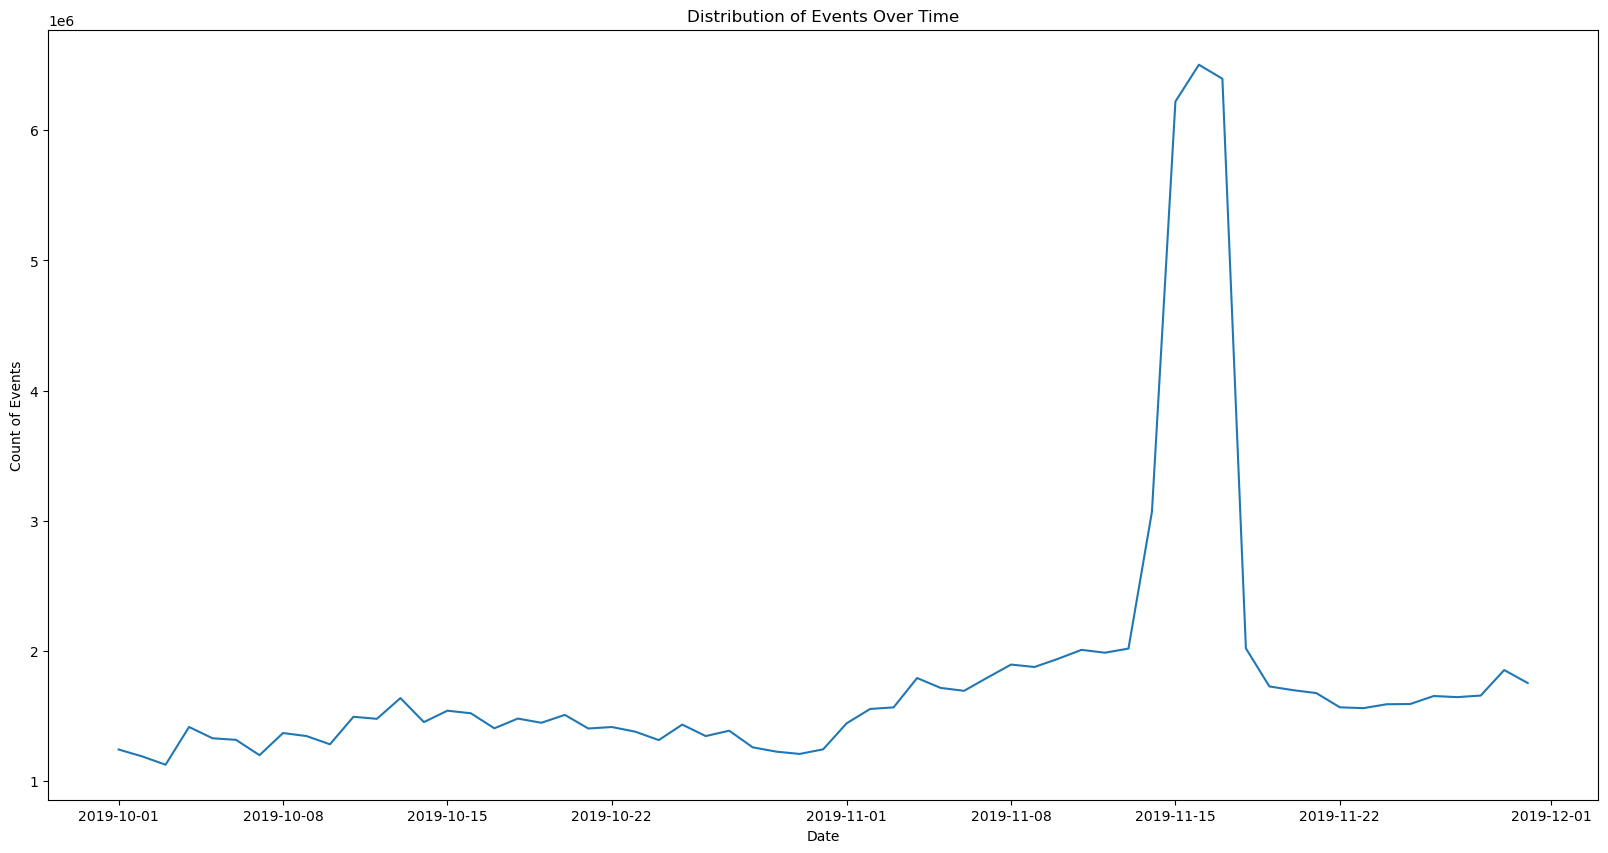

In [52]:
plt.figure(figsize=(20,10))
df['event_time'] = pd.to_datetime(df['event_time'])
df.groupby(df['event_time'].dt.date)['event_type'].count().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Count of Events')
plt.title('Distribution of Events Over Time')
plt.show()

We see the sudden spike in month of November, possibily due to the seasonality factor in apurview of which we vcan be ready with the sufficient stock, promotional offers fin this season to fuel the sales

### Top Performing Products

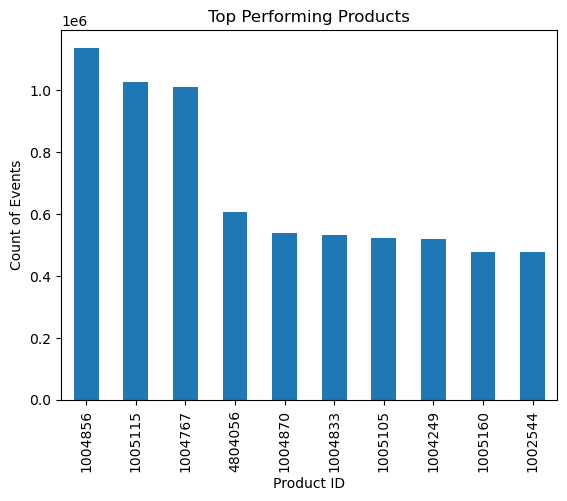

In [53]:
top_products = df.groupby('product_id')['event_type'].count().nlargest(10)
top_products.plot(kind='bar')
plt.xlabel('Product ID')
plt.ylabel('Count of Events')
plt.title('Top Performing Products')
plt.show()

### Top 10 products by price

In [56]:
top_products = df.groupby('product_id')['price'].max().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Price:")
print(top_products)


Top 10 Products by Price:
product_id
21408165     2574.07
21407287     2574.07
21408154     2574.07
39500066     2574.07
100011683    2574.07
21408156     2574.07
21407288     2574.07
21408160     2574.07
1801658      2574.04
1801803      2574.04
Name: price, dtype: float64


### Average price per product category

In [59]:
avg_price_category = df.groupby('category_code')['price'].mean().nlargest(10)
print("\nAverage Price per Product Category:")
print(avg_price_category)


Average Price per Product Category:
category_code
electronics.camera.photo            804.776620
computers.notebook                  719.844794
electronics.video.projector         706.464182
furniture.living_room.sofa          622.321849
computers.desktop                   577.997475
auto.accessories.winch              477.869063
electronics.video.tv                460.783542
appliances.kitchen.dishwasher       425.357503
sport.bicycle                       418.134104
appliances.kitchen.refrigerators    414.276651
Name: price, dtype: float64


### User engagement analysis

In [33]:
user_engagement = df.groupby('event_type')['user_id'].count()
print("\nUser Engagement Analysis:")
print(user_engagement)


User Engagement Analysis:
event_type
cart          3955434
purchase      1659788
view        104335509
Name: user_id, dtype: int64


### Cart_Conversion_rate

In [36]:
Cart_Conversion_rate=(user_engagement['cart']/user_engagement['view'])*100
Cart_Conversion_rate

3.7910717433697476

### Purchase_Conversion_rate

In [37]:
Purchase_Conversion_rate=(user_engagement['purchase']/user_engagement['view'])*100
Purchase_Conversion_rate

1.590817944828352

### Cart_to_purchase_Conversion_rate

In [38]:
Cart_to_purchase_Conversion_rate=(user_engagement['purchase']/user_engagement['cart'])*100
Cart_to_purchase_Conversion_rate

41.96222209749929

Text(0, 0.5, 'Count')

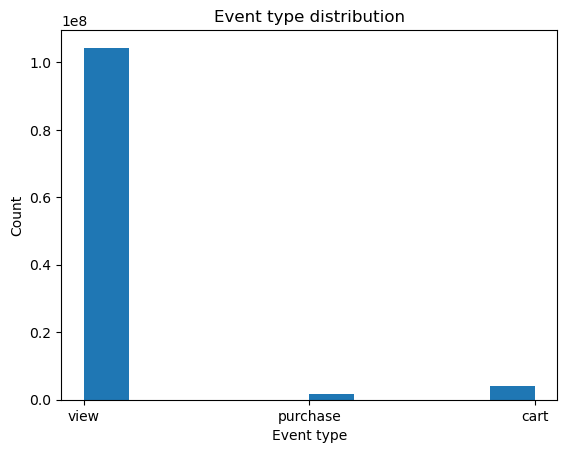

In [32]:
fig, ax = plt.subplots()
ax.hist(df['event_type'])
ax.set_title('Event type distribution')
ax.set_xlabel('Event type')
ax.set_ylabel('Count')

### Distribution of products by brand

In [65]:
product_brand_distribution = df['brand'].value_counts().nlargest(10)
print("\nDistribution of Products by Brand:")
print(product_brand_distribution)


Distribution of Products by Brand:
brand
samsung    15298439
apple      12056844
xiaomi      8968676
huawei      2930599
lucente     2140700
lg          1927787
bosch       1780704
oppo        1504553
sony        1457441
acer        1308482
Name: count, dtype: int64


In [39]:
funnel_stages = ['view', 'cart', 'purchase']
for i in range(len(funnel_stages) - 1):
    current_stage = funnel_stages[i]
    next_stage = funnel_stages[i + 1]

In [42]:
# Count users at the current stage
users_at_current_stage = df[df['event_type'] == current_stage]['user_id'].nunique()
users_at_current_stage

1054127

In [43]:
# Count users who progressed to the next stage
users_at_next_stage = df[df['event_type'] == next_stage]['user_id'].nunique()
users_at_next_stage

697470

In [44]:
# Calculate drop-off rate
drop_off_rate = 1 - (users_at_next_stage / users_at_current_stage)
drop_off_rate

0.3383434823318253

A 0.33 drop-off rate means that 33% of users are abandoning a purchase. 

Potential Reasons for a High Drop-Off Rate:
    
Complex or confusing user experience: The process might be too complicated, with unclear instructions or a cluttered layout.
Long forms or processes: Users might get overwhelmed or lose interest if there are too many steps involved.
Technical issues: Website glitches, slow loading times, or compatibility problems can frustrate users and lead them to abandon the process.
Lack of trust or security: If users don't feel safe or trust the website or company, they may be hesitant to proceed.
High prices or unexpected costs: If the final price is significantly higher than expected or there are hidden fees, users might abandon the purchase.  

How to Improve Drop-Off Rates:

Simplify the process: Break down complex processes into smaller, more manageable steps. Use clear and concise language.   
Optimize for mobile: Ensure your website or app is mobile-friendly and easy to use on smaller screens.
Provide progress indicators: Let users know how far along they are in the process to help them stay engaged.
Offer guest checkout: Allow users to complete purchases without creating an account to reduce friction.   
Provide clear and concise information: Make sure users have all the information they need to make a decision.
Use strong calls to action: Encourage users to take the next step with clear and compelling calls to action.
Test and iterate: Continuously test different elements of your website or app to identify what works best and make improvements.
Address technical issues promptly: Ensure your website is running smoothly and fix any technical problems that might be causing users to abandon the process.   
Build trust and credibility: Use testimonials, reviews, and security badges to build trust with your users.
Offer incentives or promotions: Consider offering discounts, coupons, or other incentives to encourage users to complete the process.
By addressing these potential issues and implementing these strategies, you can significantly reduce your drop-off rate and improve your overall conversion rate.

### User Segmentation

In [45]:
# Segmenting based on the number of events per user
df_user_events = df.groupby('user_id')['event_type'].count().reset_index()
df_user_events.columns = ['user_id', 'event_count']
# Define high and low engagement thresholds
high_engagement_threshold = df_user_events['event_count'].quantile(0.75)
low_engagement_threshold = df_user_events['event_count'].quantile(0.25)
# Segment users
df_user_events['engagement'] = 'Medium'
df_user_events.loc[df_user_events['event_count'] >= high_engagement_threshold, 'engagement'] = 'High'
df_user_events.loc[df_user_events['event_count'] <= low_engagement_threshold, 'engagement'] = 'Low'

In [47]:
df_user_events.sort_values(by='engagement')

,user_id,event_count,engagement
2515041,550519906,26,High
4277870,568970295,25,High
1073611,521279417,124,High
1073610,521279269,229,High
1073609,521279211,91,High
...,...,...,...
1673866,534916733,3,Medium
1673859,534916662,6,Medium
3575443,562333138,4,Medium
3575445,562333154,4,Medium


In [50]:
df_user_events.engagement.value_counts()

engagement
Medium    2233558
Low       1713800
High      1369291
Name: count, dtype: int64

In [98]:
# Convert 'Event time' to datetime object and extract the month
df['event_time'] = pd.to_datetime(df['event_time'], format='%Y-%m-%d %H:%M:%S %Z')
df['Month'] = df['event_time'].dt.to_period('M')

/var/folders/58/bj8zs9756833r3rfy1wszqn40000gn/T/ipykernel_38606/2786618678.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['event_time'].dt.to_period('M')


In [55]:
# Group by month and calculate the average price
monthly_average_price = df.groupby('Month')['price'].mean().reset_index()
# Output the result
print("Monthly Average Prices:")
print(monthly_average_price)

Monthly Average Prices:
     Month       price
0  2019-10  290.323665
1  2019-11  292.459317


In [109]:
# Group by month and event type and count the occurrences
monthly_event_counts = df.groupby(['Month', 'event_time']).size().reset_index(name='Count')

In [110]:
monthly_event_counts

,Month,event_time,Count
0,2019-10,2019-10-01 00:00:00+00:00,2
1,2019-10,2019-10-01 00:00:01+00:00,2
2,2019-10,2019-10-01 00:00:04+00:00,1
3,2019-10,2019-10-01 00:00:05+00:00,1
4,2019-10,2019-10-01 00:00:08+00:00,2
...,...,...,...
5171092,2019-11,2019-11-30 23:59:54+00:00,3
5171093,2019-11,2019-11-30 23:59:55+00:00,2
5171094,2019-11,2019-11-30 23:59:57+00:00,3
5171095,2019-11,2019-11-30 23:59:58+00:00,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


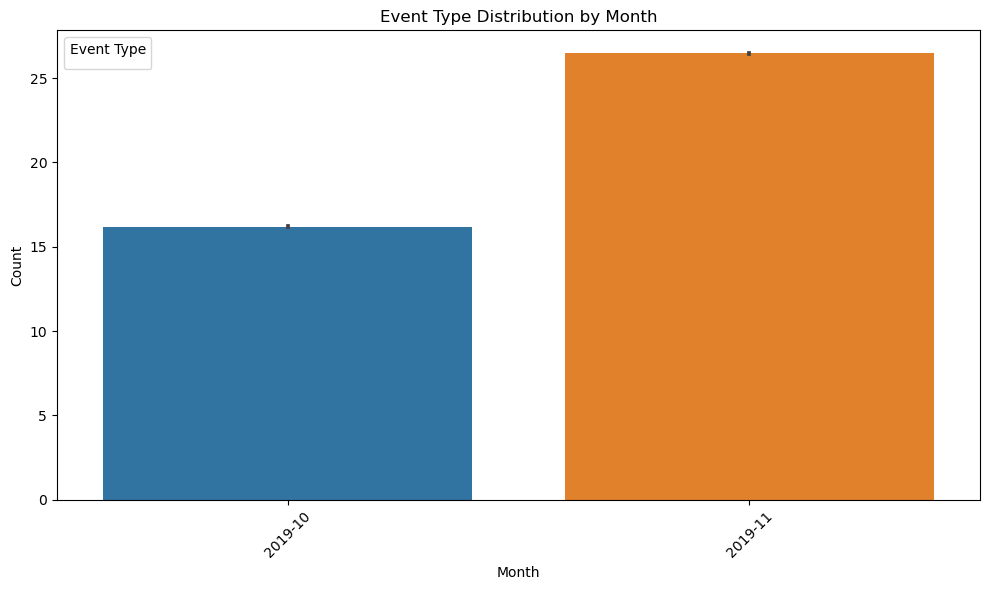

In [113]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_event_counts, x='Month', y='Count')
# Customize the plot
plt.title('Event Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Event Type')
plt.tight_layout()

# Show the plot
plt.show()

Overall Engangement has been increased reflecting the growth and progressing trend which seeems to be a good sign for the ecom

### Retention and Cohort Analysis

In [75]:
df_purchase = df[df['event_type'] == 'purchase']
df_purchase['event_date'] = df_purchase['event_time'].dt.date
df_purchase['cohort'] = df_purchase.groupby('user_id')['event_date'].transform('min')
df_purchase['order_period'] = (df_purchase['event_date'] - df_purchase['cohort']).apply(lambda x: x.days) // 30
cohort_data = df_purchase.groupby(['cohort', 'order_period']).agg(n_customers=('user_id', 'nunique')).reset_index()
cohort_pivot = cohort_data.pivot_table(index='cohort', columns='order_period', values='n_customers')

/var/folders/58/bj8zs9756833r3rfy1wszqn40000gn/T/ipykernel_16827/3608317872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase['event_date'] = df_purchase['event_time'].dt.date
/var/folders/58/bj8zs9756833r3rfy1wszqn40000gn/T/ipykernel_16827/3608317872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_purchase['cohort'] = df_purchase.groupby('user_id')['event_date'].transform('min')
/var/folders/58/bj8zs9756833r3rfy1wszqn40000gn/T/ipykernel_16827/3608317872.py:4: SettingWithCopyWarning: 
A

In [76]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [78]:
retention_matrix.head()

order_period,0,1,2
cohort,,,
2019-10-01,1.0,0.315486,0.02446
2019-10-02,1.0,0.290700,NaN
2019-10-03,1.0,0.283656,NaN
2019-10-04,1.0,0.263698,NaN
2019-10-05,1.0,0.237370,NaN


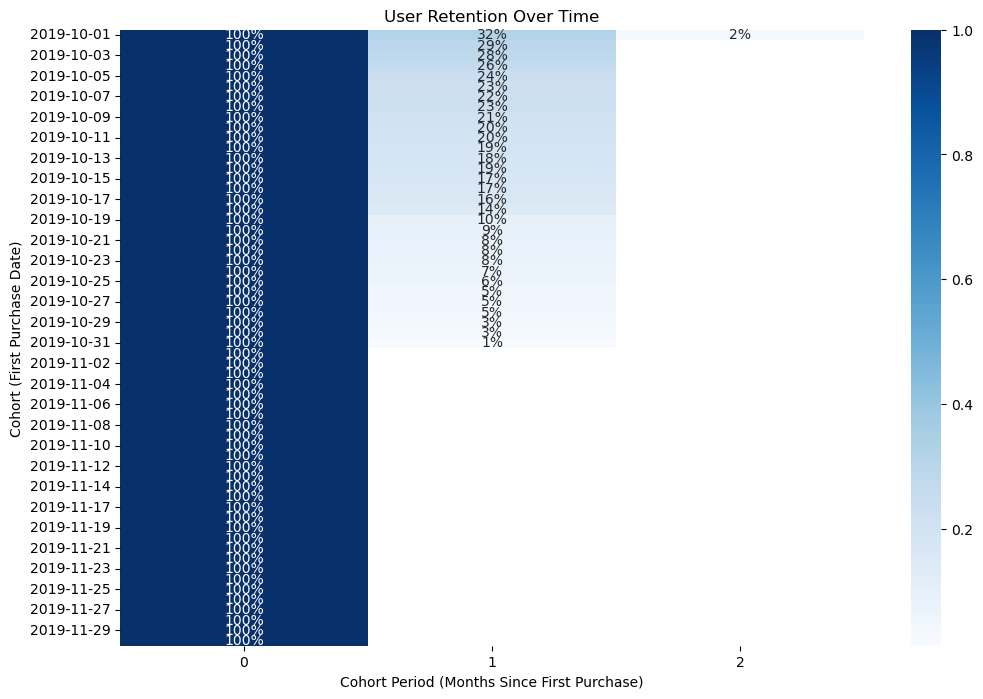

In [80]:
# Visualize the retention matrix
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap="Blues")
plt.title('User Retention Over Time')
plt.ylabel('Cohort (First Purchase Date)')
plt.xlabel('Cohort Period (Months Since First Purchase)')
plt.show()

### Key Patterns

High Initial Retention (100%): In the first month (cohort period 0), user retention is 100% for all cohorts. This is expected since all users are in their first purchase month.

Sharp Drop-Off in Month 1: There is a significant drop in user retention in the following month (cohort period 1). For most cohorts, retention falls to around 2-32%. This indicates that a large number of users do not make a repeat purchase or engage with the platform after their initial purchase.

Further Decline in Month 2: By the second month (cohort period 2), retention further drops, with some cohorts retaining as little as 1-2% of users. This suggests a steep decline in engagement after the first month and highlights that most users are not returning after the initial period.

Consistent Decline Across Cohorts: The retention rate decreases consistently across all cohorts over time, showing that the problem of user retention is not isolated to specific cohorts but rather a general trend across the board.

### Strategies to Improve Retention:

Onboarding & First Purchase Experience:

Improve Onboarding: A smooth and engaging onboarding process can help users better understand the value of the platform. Offering tutorials, personalized recommendations, or welcome discounts might keep users engaged after their first purchase.
Post-Purchase Engagement: Send personalized thank-you messages or offer discounts or promotions to incentivize users to make a second purchase within a week of their first transaction.
Loyalty Programs:

Incentivize Repeat Purchases: Implement a loyalty or rewards program where users earn points for purchases that can be redeemed for discounts. This encourages users to make repeat purchases and increases the chances of long-term retention.
Email/Push Notification Campaigns:

Engage Inactive Users: Create re-engagement campaigns that target users who haven't returned after a certain time. Personalized offers, abandoned cart reminders, or product recommendations can help bring these users back.
Educational Content: Send emails that educate users about product features, use cases, or brand stories to build a connection beyond the transaction.
Personalization & Recommendations:

Recommend Related Products: Use data from the user’s previous purchases or browsing behavior to recommend related products. Showing relevant items can increase engagement and lead to additional purchases.
Segment Users: Segment users based on their behavior and purchase patterns to provide personalized recommendations that fit their specific preferences.
Improve Product & Service Quality:

Address Customer Pain Points: Conduct surveys or analyze reviews to identify potential issues users face after their first purchase (e.g., delivery issues, product quality, customer support). Addressing these pain points can lead to better customer satisfaction and higher retention.
Follow-up After Purchase: Engage with users after their purchase to gather feedback and provide assistance if needed. This helps build trust and encourages future purchases.
Remarketing Campaigns:

Targeted Ads for Lapsed Users: Use remarketing campaigns through social media or Google Ads to target users who have dropped off after their first purchase. Showing them ads with products they previously viewed or similar items could re-engage them.
Subscription or Bundling Models:

Subscription Services: If applicable, consider offering subscription-based products that bring users back regularly (e.g., consumables, services).
Bundle Offers: Offer bundle deals where users get a discount when purchasing multiple items. This encourages users to return and buy more products

In [83]:
#Analyzing the conversion rate for different product categories
df_conversion_rates = df[df['event_type'] == 'purchase'].groupby('category_id')['event_type'].count().reset_index()
df_conversion_rates.columns = ['category_id', 'purchase_count']
df_conversion_rates = df_conversion_rates.merge(df.groupby('category_id')['event_type'].count().reset_index(), on='category_id', suffixes=('_purchase', '_total'))
df_conversion_rates['conversion_rate'] = df_conversion_rates['purchase_count'] / df['event_type'].count()
df_conversion_rates['conversion_rate']

0      5.366040e-07
1      3.606161e-05
2      5.517017e-05
3      5.598871e-05
4      1.088669e-05
           ...     
631    9.094983e-09
632    9.094983e-09
633    9.094983e-09
634    9.094983e-09
635    9.094983e-09
Name: conversion_rate, Length: 636, dtype: float64

Group by Category and Brand: We group the data by category_code, brand, and price to analyze how these factors impact conversion rates at each stage (view to add to cart, add to cart to purchase, and view to purchase).
Conversion Rate Calculation: For each category, brand, and price group, we calculate the conversion rates.
Sort for Analysis: The output is sorted by the view-to-purchase conversion rate to identify which factors perform better in driving conversions.

In [11]:
# Filter the relevant events (view, cart, purchase)
funnel_events = ['view', 'cart', 'purchase']
df_funnel = df[df['event_type'].isin(funnel_events)]

In [13]:
# Create a pivot table with counts of unique users at each funnel stage
funnel_data = df_funnel.pivot_table(index='user_session', 
                                    columns='event_type', 
                                    values='user_id', 
                                    aggfunc='nunique')

In [ ]:
# Calculate the total number of users at each funnel stage
views = funnel_data['view'].count()
add_to_carts = funnel_data['cart'].count()
purchases = funnel_data['purchase'].count()

In [16]:
# Calculate the total number of users at each funnel stage
views = funnel_data['view'].count()
add_to_carts = funnel_data['cart'].count()
purchases = funnel_data['purchase'].count()

In [19]:
# Calculate conversion rates at each stage
conversion_rate_view_to_cart = (add_to_carts / views) * 100
conversion_rate_cart_to_purchase = (purchases / add_to_carts) * 100
conversion_rate_view_to_purchase = (purchases / views) * 100

In [20]:
# Display the results
print(f'Total Views: {views}')
print(f'Total Add to Carts: {add_to_carts}')
print(f'Total Purchases: {purchases}')
print(f'Conversion Rate (View to Add to Cart): {conversion_rate_view_to_cart:.2f}%')
print(f'Conversion Rate (Add to Cart to Purchase): {conversion_rate_cart_to_purchase:.2f}%')
print(f'Conversion Rate (View to Purchase): {conversion_rate_view_to_purchase:.2f}%')

Total Views: 23005603
Total Add to Carts: 2316432
Total Purchases: 1402758
Conversion Rate (View to Add to Cart): 10.07%
Conversion Rate (Add to Cart to Purchase): 60.56%
Conversion Rate (View to Purchase): 6.10%


Key Findings:
High view volume: The total views are substantial, indicating a significant level of product interest.
Low conversion rates: While the initial conversion rate from view to add to cart is reasonable, the subsequent conversion rate from add to cart to purchase is relatively low, suggesting a significant drop-off in the buying journey.
Bottleneck in the checkout process: The low add to cart to purchase conversion rate points to a potential bottleneck in the checkout process.

Actionable Insights and Recommendations:
Optimize Checkout Process:

Simplify the checkout flow: Remove unnecessary steps, streamline form fields, and offer guest checkout options to reduce friction.
Provide clear and concise product information: Ensure that product pages have all relevant details, including high-quality images, detailed descriptions, and customer reviews.
Implement a secure and reliable payment gateway: Offer a variety of payment options to cater to different preferences.
Provide progress indicators: Keep users informed about their progress through the checkout process to reduce anxiety.

Enhance Product Discovery:

Improve search functionality: Ensure that the search bar is prominently displayed and that search results are relevant and easy to navigate.
Implement effective product categorization: Organize products into clear and intuitive categories to help users find what they're looking for.
Utilize personalized recommendations: Use algorithms to recommend products based on users' browsing history and purchase behavior.
Leverage User-Generated Content:

Encourage product reviews: Incentivize customers to leave reviews to build trust and provide social proof.
Feature user-generated content: Showcase customer photos and videos to create a more engaging shopping experience.
Optimize Mobile Experience:

Ensure mobile-friendliness: Design the website and app to be responsive and easy to use on smaller screens.
Offer one-click checkout: Simplify the mobile checkout process to reduce abandonment rates.
Implement Retargeting Campaigns:

Reach out to abandoned carts: Send email reminders to users who have added products to their cart but didn't complete the purchase.
Target website visitors: Use retargeting ads to re-engage users who have visited your site but haven't made a purchase.
A/B Testing:

Experiment with different elements: Continuously test variations of your website, product pages, and checkout process to identify what works best for your audience.
By implementing these recommendations, you can significantly improve user engagement, retention, and conversion rates, ultimately driving increased sales and revenue.

In [ ]:
# Calculate conversion rates for price ranges
price_conversion['view_to_cart_conversion'] = (price_conversion['add_to_carts'] / price_conversion['views']) * 100
price_conversion['cart_to_purchase_conversion'] = (price_conversion['purchases'] / price_conversion['add_to_carts']) * 100
price_conversion['view_to_purchase_conversion'] = (price_conversion['purchases'] / price_conversion['views']) * 100

In [37]:
conversion_rate = df_purchase['user_id'].nunique() / df_purchase.shape[0]

In [38]:
conversion_rate

0.4202163167826253

### Price Analysis:

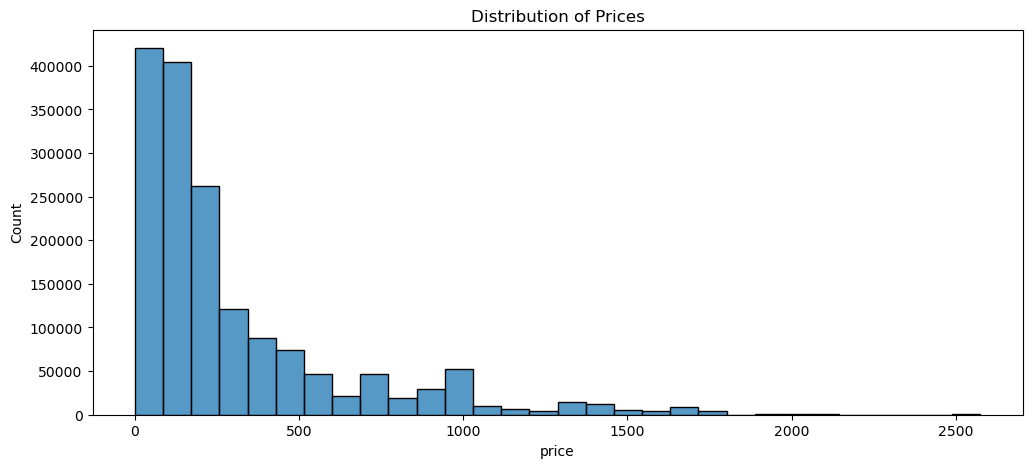

In [40]:
# Distribution of prices and conversion rates
plt.figure(figsize=(12, 5))
sns.histplot(df_purchase['price'], bins=30)
plt.title('Distribution of Prices')
plt.show()

Insight: Conversion rates often vary by price range. Products priced too high may have lower conversions.
Recommendation:
Discount Strategy: For products in higher price ranges with lower conversion rates, offering seasonal or limited-time discounts could help incentivize conversions.
Installments or Financing: Offering installment payment options for higher-priced products may reduce friction for customers.
Free Shipping: Consider offering free shipping or other incentives for higher-priced products to encourage purchases.

### Analyzing the Relationship Between Price and Conversion Rate

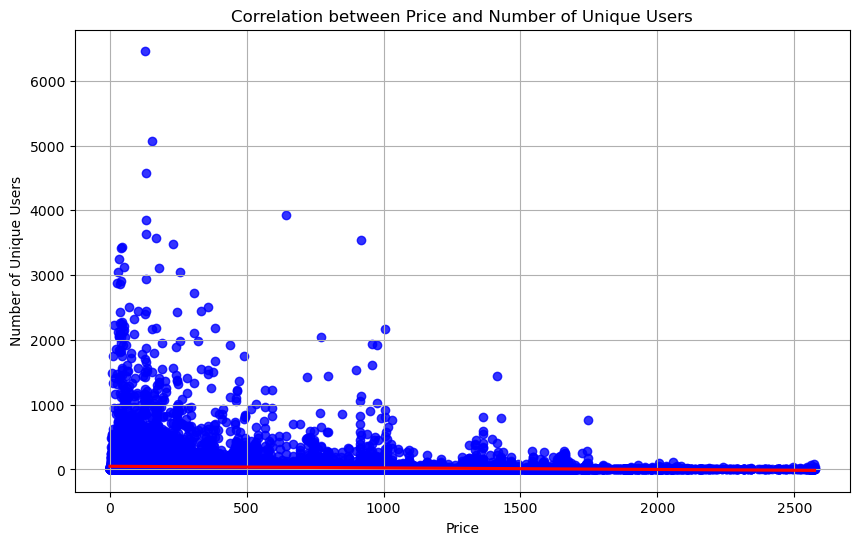

In [44]:
price_user_data = df_purchase.groupby('price')['user_id'].nunique().reset_index()

# Plot the correlation between price and unique users
plt.figure(figsize=(10, 6))
sns.regplot(x='price', y='user_id', data=price_user_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Correlation between Price and Number of Unique Users')
plt.xlabel('Price')
plt.ylabel('Number of Unique Users')
plt.grid(True)
plt.show()

Lower Prices are attracting greater number of customers while the price increment is inversely proportional to the user count

In [86]:
price_bins = pd.cut(df_purchase['price'], bins=10)
grouped_data = df_purchase.groupby(price_bins)['user_id'].nunique()
conversion_rates = grouped_data / df.shape[0]
print(conversion_rates)

price
(-1.803, 258.1]       0.004778
(258.1, 515.43]       0.001481
(515.43, 772.76]      0.000591
(772.76, 1030.09]     0.000504
(1030.09, 1287.42]    0.000108
(1287.42, 1544.75]    0.000171
(1544.75, 1802.08]    0.000094
(1802.08, 2059.41]    0.000013
(2059.41, 2316.74]    0.000004
(2316.74, 2574.07]    0.000005
Name: user_id, dtype: float64


In [87]:
conversion_rates=pd.DataFrame(conversion_rates).reset_index()
conversion_rates.head()

,price,user_id
0,"(-1.803, 258.1]",0.004778
1,"(258.1, 515.43]",0.001481
2,"(515.43, 772.76]",0.000591
3,"(772.76, 1030.09]",0.000504
4,"(1030.09, 1287.42]",0.000108


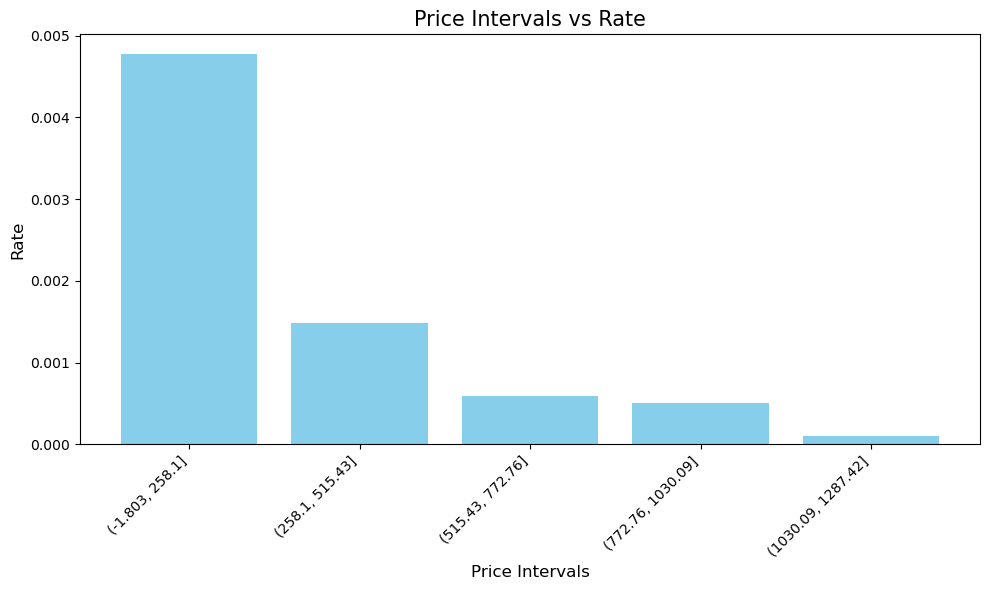

In [91]:
conversion_rate_data = {
    'price': pd.IntervalIndex.from_tuples([(-1.803, 258.1), (258.1, 515.43), 
                                           (515.43, 772.76), (772.76, 1030.09), 
                                           (1030.09, 1287.42)]),
    'rate': [0.004778, 0.001481, 0.000591, 0.000504, 0.000108]}
# Create a dataframe
df = pd.DataFrame(conversion_rate_data)

# Convert the price column from Interval to string format for plotting
df['price_str'] = df['price'].astype(str)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(df['price_str'], df['rate'], color='skyblue')

# Adding labels and title
plt.xlabel('Price Intervals', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('Price Intervals vs Rate', fontsize=15)

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

As We can see, the rate decreases significantly as the price increases. The highest conversion rates are concentrated in the lower price range (below $258.1), and the rates drop as the prices go up.

Key insights:
The conversion rate is highest in the lowest price bracket.
As the price increases, the conversion rate steadily drops.

Actionable Recommendations:
Focus on promoting lower-priced items to maintain higher conversion rates.
Experiment with discount strategies or bundling higher-priced items to encourage conversions.
Use targeted marketing campaigns for higher-priced items to specific customer segments willing to spend more. 

Category Analysis:
Insight: Some product categories may have higher conversion rates than others (e.g., electronics vs. apparel).
Recommendation: Focus marketing efforts and promotional campaigns on high-converting categories. For lower-converting categories, consider bundling products with higher-converting items or providing additional product information (e.g., reviews, product demos).
Brand Analysis:
Insight: Certain brands may have significantly higher conversion rates.
Recommendation: Highlight high-performing brands on your homepage and feature them in promotional materials. For lower-converting brands, consider offering limited-time discounts or improving product descriptions and reviews to build trust.

### General Recommendations to Improve Conversion Rates

Personalized Recommendations:

Use machine learning or recommendation engines to suggest products based on user browsing or purchasing history. This can help surface products the user is more likely to purchase.
A/B Testing:

Continuously A/B test different aspects of the purchase funnel (e.g., product page layout, call-to-action buttons, checkout process) to identify elements that increase conversions.
Product Page Optimization:

Improve product descriptions, include high-quality images, and ensure the product reviews section is visible. Highlight user-generated content like reviews or testimonials for better trust-building.
Customer Support and Live Chat:

Provide real-time assistance via live chat or chatbots to answer customer questions, particularly on high-ticket items, which can help reduce hesitation and increase conversions.
Urgency and Scarcity Tactics:

Use urgency techniques like showing limited stock availability or countdown timers for promotions to encourage customers to complete their purchases.
Simplify the Checkout Process:

A complicated checkout process is one of the biggest reasons for cart abandonment. Streamline the process by reducing the number of steps and offering guest checkout options.
By implementing these recommendations and regularly analyzing the conversion rates for various factors like category, brand, and price, you can optimize the funnel and drive higher conversions.